# TP 1: Sequential stock data in one dimension
## Numerical processing of financial data APM 50442 EP

Matthieu Garcin


We're going to work with a large American stock index, the S&P 500 index, whose constituents are the 500 American stocks with the largest capitalization (80% of the capitalization of American stocks: a larger American Index is Russell 3000). The value of the index is the weighted mean of the value of these stocks.

We will focus first on the time series of prices, returns and volatility.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Import the yfinance package
import yfinance as yf

# If you get the "ModuleNotFoundError", then
# 1) Either install yfinance by running the command
#  !python -m pip install yfinance --upgrade --no-cache-dir
# from your Jupyter notebook;
# 2) Or run this notebook in Google Colab.

# First analysis: prices (Q1)

We first upload the historical time series of daily prices of one of the biggest constituents of the S&P 500 index, namely the stock JPMorgan Chase & Co. We retrieve it from the yahoo finance database

In [3]:
start_date = '2005-01-01'
end_date = '2023-12-31'

data_JPM = yf.download(tickers="JPM", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Let us have a look at the content of our data frame.

In [4]:
print("data_JPM shape : ", data_JPM.shape)
data_JPM.head()

data_JPM shape :  (4781, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM,JPM
Date,,,,,,
2005-01-03 00:00:00+00:00,22.842476,39.150002,39.689999,39.009998,39.480000,14957900
2005-01-04 00:00:00+00:00,22.607040,38.410000,39.060001,38.320000,38.980000,11360900
2005-01-05 00:00:00+00:00,22.654129,38.490002,38.919998,38.389999,38.599998,9770200
2005-01-06 00:00:00+00:00,22.783619,38.709999,38.980000,38.639999,38.770000,9115900
2005-01-07 00:00:00+00:00,22.601162,38.400002,38.869999,38.389999,38.689999,9971200


Let us plot the series of daily values:

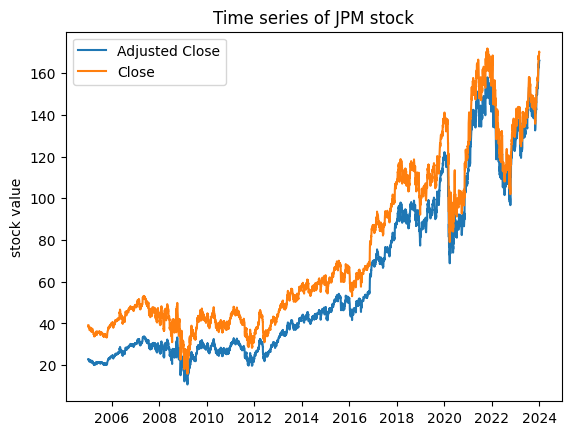

In [5]:
plt.plot(data_JPM['Adj Close'],label='Adjusted Close')
plt.plot(data_JPM['Close'],label='Close')
plt.title("Time series of JPM stock")
plt.ylabel("stock value")
plt.grid(False)
plt.legend()
plt.show()

**Question 1**: How can one explain the difference between the adjusted close and the close? Does the difference increase progressively or is it explained by a limited number of events?



*   **1.a/** Choose a relevant indicator to find where a new gap appears between Close and Adjusted close. Put it in a new column.



In [6]:
print("Ratio at the first date:", data_JPM['Adj Close'].values[0] / data_JPM['Close'].values[0]) #iloc also gives some non-numerical information
data_JPM['Adj_Close_to_Close_Ratio'] = data_JPM['Adj Close'].values / data_JPM['Close'].values
data_JPM.head()

Ratio at the first date: [0.58346041]


Price,Adj Close,Close,High,Low,Open,Volume,Adj_Close_to_Close_Ratio
Ticker,JPM,JPM,JPM,JPM,JPM,JPM,
Date,,,,,,,
2005-01-03 00:00:00+00:00,22.842476,39.150002,39.689999,39.009998,39.480000,14957900,0.583460
2005-01-04 00:00:00+00:00,22.607040,38.410000,39.060001,38.320000,38.980000,11360900,0.588572
2005-01-05 00:00:00+00:00,22.654129,38.490002,38.919998,38.389999,38.599998,9770200,0.588572
2005-01-06 00:00:00+00:00,22.783619,38.709999,38.980000,38.639999,38.770000,9115900,0.588572
2005-01-07 00:00:00+00:00,22.601162,38.400002,38.869999,38.389999,38.689999,9971200,0.588572


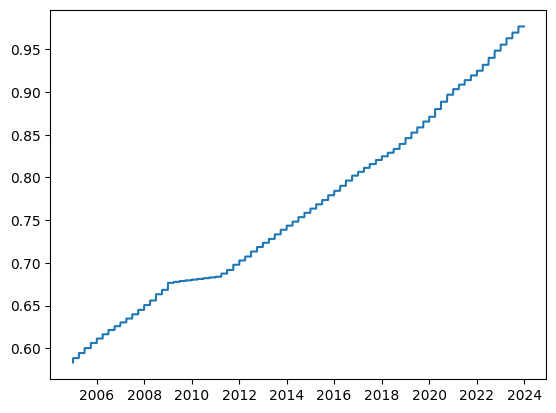

In [7]:
plt.plot(data_JPM['Adj_Close_to_Close_Ratio'],label='Adj_Close_to_Close_Ratio')

In [ ]:
data_JPM['Ratio_Variation'] = data_JPM['Adj_Close_to_Close_Ratio'].round(5).diff().abs() > 0
#We round the numbers so that we don't get false variations (4 is enough, 5 will lead to spurious variations).
#Diff provides us with the one-day variation.
data_JPM.head()

Price,Adj Close,Close,High,Low,Open,Volume,Adj_Close_to_Close_Ratio,Ratio_Variation
Ticker,JPM,JPM,JPM,JPM,JPM,JPM,,
Date,,,,,,,,
2005-01-03 00:00:00+00:00,22.842476,39.150002,39.689999,39.009998,39.480000,14957900,0.583460,False
2005-01-04 00:00:00+00:00,22.607040,38.410000,39.060001,38.320000,38.980000,11360900,0.588572,True
2005-01-05 00:00:00+00:00,22.654129,38.490002,38.919998,38.389999,38.599998,9770200,0.588572,False
2005-01-06 00:00:00+00:00,22.783619,38.709999,38.980000,38.639999,38.770000,9115900,0.588572,False
2005-01-07 00:00:00+00:00,22.601162,38.400002,38.869999,38.389999,38.689999,9971200,0.588572,False




*   **1.b/** Determine the proportion of dates for which there is a variation, as well as the list of corresponding dates.



In [9]:
#Proportion of dates for which there is a variation
proportion_variation = data_JPM['Ratio_Variation'].mean()
print("Proportion of days at which the ratio varies:", proportion_variation.round(4))
#Dates at which there is a variation
dates_variation = data_JPM[data_JPM['Ratio_Variation']].index #'Date' is the index of the dataframe
print("Dates at which there is a variation:")
print(dates_variation) #A dividend is paid each quarter.

Proportion of days at which the ratio varies: 0.0427
Dates at which there is a variation:
DatetimeIndex(['2005-01-04 00:00:00+00:00', '2005-04-04 00:00:00+00:00',
               '2005-07-01 00:00:00+00:00', '2005-10-04 00:00:00+00:00',
               '2006-01-04 00:00:00+00:00', '2006-04-04 00:00:00+00:00',
               '2006-07-03 00:00:00+00:00', '2006-10-04 00:00:00+00:00',
               '2007-01-03 00:00:00+00:00', '2007-04-03 00:00:00+00:00',
               ...
               '2022-06-23 00:00:00+00:00', '2022-06-27 00:00:00+00:00',
               '2022-06-30 00:00:00+00:00', '2022-07-01 00:00:00+00:00',
               '2022-07-05 00:00:00+00:00', '2022-10-05 00:00:00+00:00',
               '2023-01-05 00:00:00+00:00', '2023-04-05 00:00:00+00:00',
               '2023-07-05 00:00:00+00:00', '2023-10-05 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=204, freq=None)


* **1.c/** Create a histogram depicting the distribution of the length of the time interval between two consecutive jumps of the indicator.



Distribution of the time interval between two successive variations:
count    203.000000
mean      33.733990
std       41.953394
min        1.000000
25%        1.000000
50%        4.000000
75%       90.000000
max       95.000000
Name: Date, dtype: float64


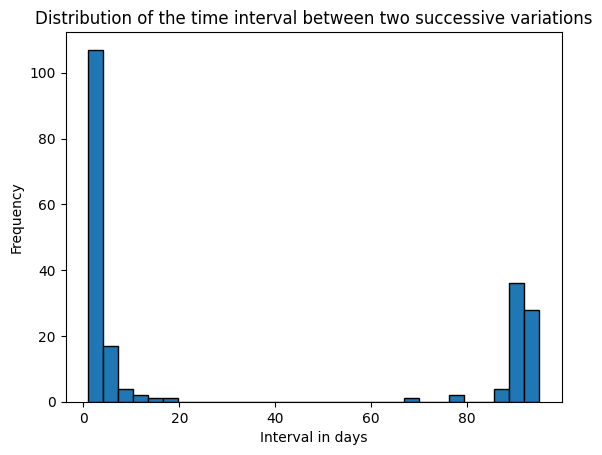

In [10]:
#time interval (number of days between two successive variations)
time_interval = dates_variation.to_series().diff().dt.days
print("Distribution of the time interval between two successive variations:")
print(time_interval.describe())  #Descriptive statistics
#Histogram
plt.hist(time_interval, bins=30, edgecolor='black')
plt.title("Distribution of the time interval between two successive variations")
plt.xlabel("Interval in days")
plt.ylabel("Frequency")
plt.show()

**Question 2**: Is there the same discrepancy between Close and adjusted Close for the S&P 500 index?

[*********************100%***********************]  1 of 1 completed


data_SP500 shape :  (4781, 6)


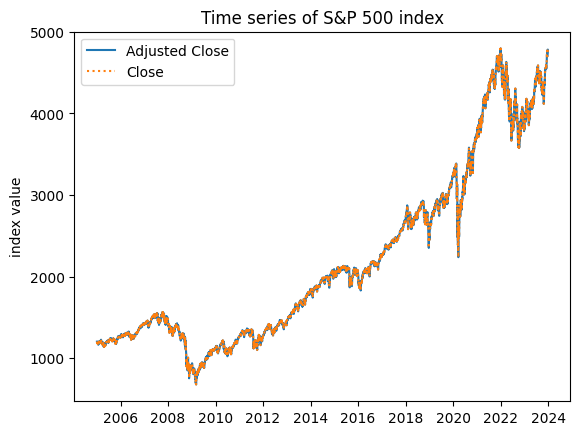

In [11]:
data_SP500 = yf.download(tickers="^GSPC", start=start_date, end=end_date)
print("data_SP500 shape : ", data_SP500.shape)
data_SP500.head()
plt.plot(data_SP500['Adj Close'],label='Adjusted Close')
plt.plot(data_SP500['Close'],label='Close',linestyle=':')
plt.title("Time series of S&P 500 index")
plt.ylabel("index value")
plt.grid(False)
plt.legend()
plt.show()
#no difference between close and adjusted close.

# Daily returns

We wish to analyze the series of daily returns that we can extract from the series above of daily valus of the S&P 500.

The cell below casts the series of observation dates and the corresponding values of the S&P 500 index ('Adj Close' column) onto numpy arrays. You can either manipulate these numpy arrays or directly work with the Series objects from the DataFrame (as above) -- this is up to you.

In [12]:
dates = np.array(data_SP500.index)
values = np.array(data_SP500['Adj Close'])

## Arithmetic returns (Q2)

Let $S_t$ be the daily series of values observed for the SP500 index, for $t \in \mbox{ dates}$.

The arithmetic returns $R_t$ are defined by
$$
R_t = \frac{S_{t+1} - S_t}{S_t} = \frac{S_{t+1}}{S_t} - 1.
$$

**Question 2:** What are the artihmetic price returns? Do they provide us with a stationary time series? Compare to the time series of prices.

*   **2.a/** Construct the time-series of arithmetic returns and plot it against the observation dates.

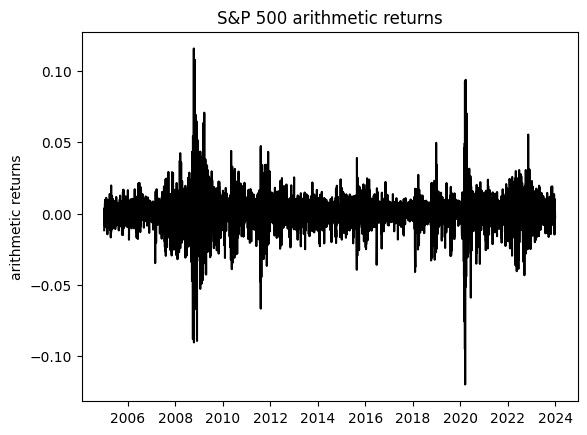

In [13]:
from datetime import date
arithmetic_returns_aux = (values[1:] - values[0:-1]) / values[0:-1]
arithmetic_returns=arithmetic_returns_aux.flatten() #from a 2D array (n,1) in a 1D array
return_dates = dates[1:]

plt.plot(return_dates, arithmetic_returns, color='k')
plt.title("S&P 500 arithmetic returns")
plt.ylabel("arithmetic returns")
plt.show()

* **2.b/** Use the augmented Dickey-Fuller test to determine whether the price and the return series are stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# apply ADF test to prices
result_ADF_price = adfuller(values)  # dropna if you have to remove missing values
print('ADF Statistic:', result_ADF_price[0])
print('p-value:', result_ADF_price[1])
print('Critical Values:', result_ADF_price[4])
if result_ADF_price[1] <= 0.05:
    print("The non-stationarity hypothesis (H_0) is rejected for prices (p-value <= 0.05).")
else:
    print("The non-stationarity hypothesis (H_0) is not rejected for prices (p-value > 0.05).")

# apply ADF test to price returns
result_ADF_returns = adfuller(arithmetic_returns)
print('ADF Statistic:', result_ADF_returns[0])
print('p-value:', result_ADF_returns[1])
print('Critical Values:', result_ADF_returns[4])
if result_ADF_returns[1] <= 0.05:
    print("The non-stationarity hypothesis (H_0) is rejected for price returns (p-value <= 0.05).")
else:
    print("The non-stationarity hypothesis (H_0) is not rejected for price returns (p-value > 0.05).")

ADF Statistic: 1.0561480858830246
p-value: 0.9948244274242792
Critical Values: {'1%': -3.431728019988808, '5%': -2.862148928711039, '10%': -2.567094134713042}
The non-stationarity hypothesis (H_0) is not rejected for prices (p-value > 0.05).
ADF Statistic: -17.086309988963787
p-value: 7.645055419340024e-30
Critical Values: {'1%': -3.431723966504064, '5%': -2.8621471379437025, '10%': -2.5670931814107942}
The non-stationarity hypothesis (H_0) is rejected for price returns (p-value <= 0.05).


* **2.c/** Display the (stationary) distribution of price returns using a histogram.

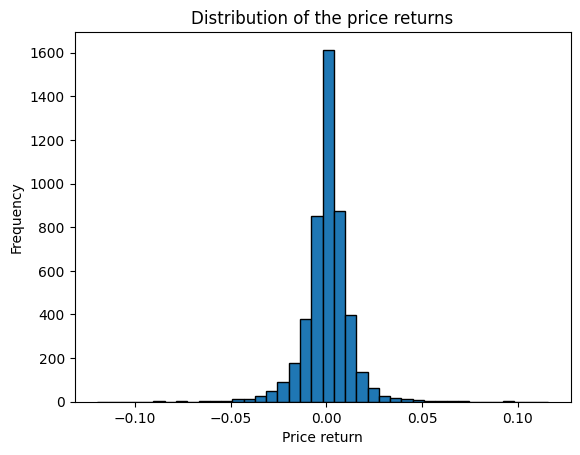

In [15]:
#histogram
plt.hist(arithmetic_returns, bins=40, edgecolor='black')
plt.title("Distribution of the price returns")
plt.xlabel("Price return")
plt.ylabel("Frequency")
plt.show()

* **2.d/**  Does it look like a Gaussian distribution?



Mean of returns:  0.00036367406376121357
Variance of returns:  0.00015015806467178362
Skewness of returns:  -0.255684643522457
Kurtosis of returns:  12.601190946450043
The Gaussian nature of the kurtosis of the returns (H_0) is rejected (p-value =  3.0455163593228385e-209 ).
Kolmogorov-Smirnov statistic:  0.1071995368988439
p-value of Kolmogorov-Smirnov test:  2.7382468101136845e-48


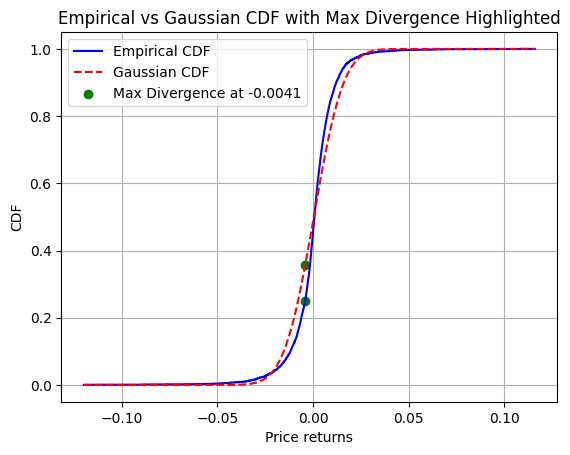

In [16]:
#test using moments
import scipy.stats as stats
mean_return = arithmetic_returns.mean()
var_return = arithmetic_returns.var()
std_return = math.sqrt(var_return)
print("Mean of returns: ",mean_return)
print("Variance of returns: ",var_return)
print("Skewness of returns: ",stats.skew(arithmetic_returns))
print("Kurtosis of returns: ",stats.kurtosis(arithmetic_returns,fisher=True)) #Fisher=True means it is the excess kurtosis
test_kurtosis_Gauss=stats.kurtosistest(arithmetic_returns)
if test_kurtosis_Gauss.pvalue<= 0.05:
    print("The Gaussian nature of the kurtosis of the returns (H_0) is rejected (p-value = ",test_kurtosis_Gauss.pvalue,").")
else:
    print("The Gaussian nature of the kurtosis of the returns (H_0) is not rejected (p-value = ",test_kurtosis_Gauss.pvalue,").")

#Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = stats.kstest(arithmetic_returns, 'norm', args=(mean_return, std_return))
print("Kolmogorov-Smirnov statistic: ", ks_statistic)
print("p-value of Kolmogorov-Smirnov test: ", ks_pvalue)

##Illustration of Kolmogorov-Smirnov: empirical and Gaussian cdf and highlighting max divergence between them.
#empirical and Gaussian cdf in the same grid (corresponding to data)
sorted_returns = np.sort(arithmetic_returns)
ecdf = np.arange(1, len(sorted_returns)+1) / len(sorted_returns) #np.arange returns evenly spaced values within a given interval, that is [1,2,...,N].
gaussian_cdf = stats.norm.cdf(sorted_returns, loc=mean_return, scale=std_return)
#divergence
divergence = np.abs(ecdf - gaussian_cdf)
max_divergence_index = np.argmax(divergence)
max_divergence_value = divergence[max_divergence_index]
max_divergence_point = sorted_returns[max_divergence_index]
#Visualisation
plt.step(sorted_returns, ecdf, label="Empirical CDF", color='blue')
plt.plot(sorted_returns, gaussian_cdf, label="Gaussian CDF", color='red', linestyle='--')
plt.scatter(max_divergence_point, ecdf[max_divergence_index], color='green', label=f'Max Divergence at {max_divergence_point:.4f}')
plt.scatter(max_divergence_point, gaussian_cdf[max_divergence_index], color='green')
plt.title("Empirical vs Gaussian CDF with Max Divergence Highlighted")
plt.xlabel("Price returns")
plt.ylabel("CDF")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

Possible extension: You could do the same exercise by simply changing the time interval. Zooming in a shorter period may lead to other empirical observations. For example, some simple models (Gaussian, e.g.) may be relevant at short time scales (that is it is impossible to statistically reject them) but not for longer ones. Finding the threshold of scale above which a model is flawed is a useful knowledge.

# Volatility

Using a dataset (Excel files) of one-minute observations (OHLC prices), we are going to estimate volatility by various means. The dataset consists in the 40 constituents of the French stock index CAC 40 (as of 2022/2023). The biggest capitalizations are: LVMH (MC), L'Oréal (OR), TotalEnergies (TTE), Sanofi (SAN), Hermès (RMS), Airbus (AIR)...

The time range is September 2022-March 2023. Pay attention to the fact that there are variations of a few days between starting dates of two time series. Some stocks also don't have a price every minute (less liquid, like SW).



## Realized volatility (Q4)

The realized volatility is the standard deviation of non-overlapping intraday arithmetic price returns, for a given time scale (1 minute, 5 minute, etc.). The bigger the time step, the lower the number of observations, and the higher the variance of the estimator.

**Question 4**: Calculate the realized volatility of an asset of your choice among those provided for the tutorial.

* **4.a/** Import the data (if using Google Colab, save them in the files in your project) and build a time series of realized volatility based on a one-minute returns.

In [21]:
#Import the data
import pandas as pd
#!pip install openpyxl (if necessary)
data_AIR = pd.read_excel('/content/AIR_Prices.xlsx', engine='openpyxl', header=1) #header=1 indicates the right lign where to find the headers
print(data_AIR.head())

                Dates    Open   Close    High     Low
0 2022-09-13 09:00:00  100.24  100.28  100.38  100.14
1 2022-09-13 09:01:00  100.26  100.26  100.36  100.22
2 2022-09-13 09:02:00  100.24  100.24  100.26  100.22
3 2022-09-13 09:03:00  100.22  100.26  100.28  100.12
4 2022-09-13 09:04:00  100.22  100.26  100.26  100.20


In [22]:
#Create a column for the date only, for the time only, and one for the price return
data_AIR['Date only'] = data_AIR['Dates'].dt.date
data_AIR['Hour_Minute'] = data_AIR['Dates'].dt.strftime('%H:%M')
data_AIR['Return'] = data_AIR['Close'].pct_change()
print(data_AIR.head())

                Dates    Open   Close    High     Low   Date only Hour_Minute  \
0 2022-09-13 09:00:00  100.24  100.28  100.38  100.14  2022-09-13       09:00   
1 2022-09-13 09:01:00  100.26  100.26  100.36  100.22  2022-09-13       09:01   
2 2022-09-13 09:02:00  100.24  100.24  100.26  100.22  2022-09-13       09:02   
3 2022-09-13 09:03:00  100.22  100.26  100.28  100.12  2022-09-13       09:03   
4 2022-09-13 09:04:00  100.22  100.26  100.26  100.20  2022-09-13       09:04   

     Return  
0       NaN  
1 -0.000199  
2 -0.000199  
3  0.000200  
4  0.000000  


In [23]:
# Group the data by day (excluding the first line, which is a return between two distinct days)
data_AIR_no_first = data_AIR[data_AIR.groupby('Date only').cumcount() > 0] #.cumcount()>0 makes it possible to remove the first line of each group
#Calculate the standard deviation of the returns for each day as well as the number of observations used
daily_volatility = data_AIR_no_first.groupby('Date only')['Return'].std()
daily_count = data_AIR_no_first.groupby('Date only').size()
#Create a dataframe for the dates and the volatilities
daily_stats_AIR_df = pd.DataFrame({
    'Date': daily_volatility.index,
    '1-mn vol': daily_volatility.values,
    '1-mn nb of obs': daily_count.values
})
print(daily_stats_AIR_df.head())

         Date  1-mn vol  1-mn nb of obs
0  2022-09-13  0.000880             508
1  2022-09-14  0.000665             511
2  2022-09-15  0.000611             509
3  2022-09-16  0.000639             512
4  2022-09-19  0.000627             510


* **4.b/** Annualize this volatility.

In [24]:
#252 days each year, number of minutes each day approximatively 512: so 252*512 1-min time intervals in a year
daily_stats_AIR_df['1-mn vol'] = daily_stats_AIR_df['1-mn vol'] * np.sqrt(252 * 512)
print(daily_stats_AIR_df.head())

         Date  1-mn vol  1-mn nb of obs
0  2022-09-13  0.316014             508
1  2022-09-14  0.238979             511
2  2022-09-15  0.219484             509
3  2022-09-16  0.229541             512
4  2022-09-19  0.225358             510


* **4.c/** Calculate also annualized realized volatilities each day for other time steps (2 minutes, 3 minutes, 30 minutes). We accept you use overlapping increments.

In [25]:
#Create a new dataframe for the volatilities
volatility_df = pd.DataFrame()

for interval in range(2, 31):  # From 2 to 30 minutes
    # Calculate returns
    col_name = f'Return_{interval}mn'
    data_AIR[col_name] = data_AIR['Close'].pct_change(periods=interval)

    # Exclude first observation
    data_AIR[col_name] = data_AIR.groupby('Date only')[col_name].shift(1)

    # Calculate the volatility
    volatility_col = f'{interval}-mn vol'
    volatility_df[volatility_col] = data_AIR.groupby('Date only')[col_name].std()

    # Annualize
    volatility_df[volatility_col] = volatility_df[volatility_col] * np.sqrt(252 * 512 / interval)

    # Number of observations
    count_col = f'{interval}-mn nb of obs'
    volatility_df[count_col] = data_AIR.groupby('Date only')[col_name].count()

# Put the results in daily_stats_AIR_df
daily_stats_AIR_df = daily_stats_AIR_df.set_index('Date')
daily_stats_AIR_df = daily_stats_AIR_df.join(volatility_df, on='Date')

# Print the result
print(daily_stats_AIR_df.head())

            1-mn vol  1-mn nb of obs  2-mn vol  2-mn nb of obs  3-mn vol  \
Date                                                                       
2022-09-13  0.316014             508  0.294931             506  0.299660   
2022-09-14  0.238979             511  0.264002             511  0.254775   
2022-09-15  0.219484             509  0.224205             509  0.216442   
2022-09-16  0.229541             512  0.426473             512  0.426759   
2022-09-19  0.225358             510  0.233169             510  0.238488   

            3-mn nb of obs  4-mn vol  4-mn nb of obs  5-mn vol  \
Date                                                             
2022-09-13             505  0.301850             504  0.296439   
2022-09-14             511  0.255317             511  0.255145   
2022-09-15             509  0.210933             509  0.209380   
2022-09-16             512  0.432875             512  0.435326   
2022-09-19             510  0.242758             510  0.242949   

    

* **4.d/** Plot the trajectories of the various volatilities.

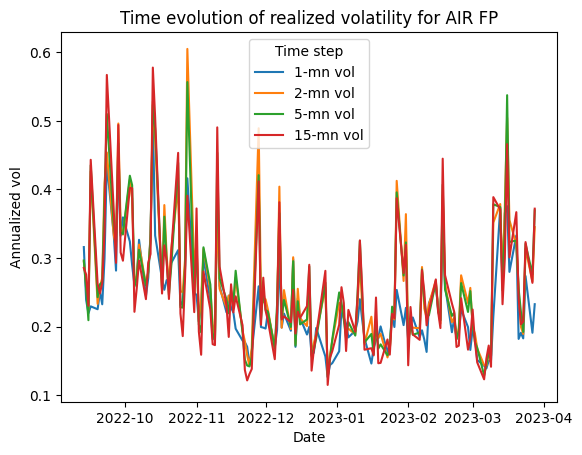

In [26]:
# Select the columns to be displayed (two solutions below, depending on how many trajectories we're interested in)
#volatility_columns = [f'{interval}-mn vol' for interval in range(1, 31)]
volatility_columns = ['1-mn vol', '2-mn vol', '5-mn vol', '15-mn vol']

# Plot them
for col in volatility_columns:
    plt.plot(daily_stats_AIR_df.index, daily_stats_AIR_df[col], label=col)
plt.title('Time evolution of realized volatility for AIR FP')
plt.xlabel('Date')
plt.ylabel('Annualized vol')
plt.legend(title="Time step")
plt.show()

* **4.e/** For a given day, plot the various volatilities as a function of the time scale.

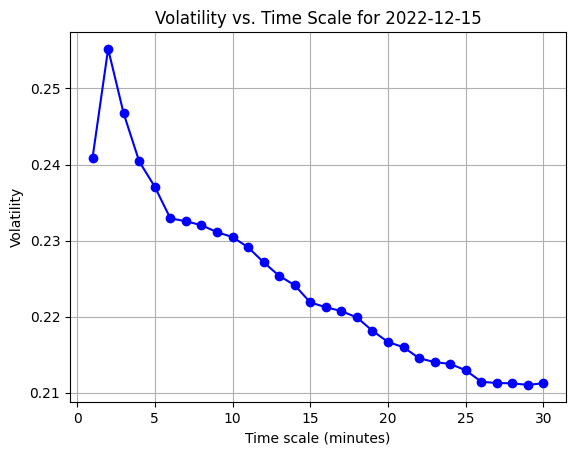

In [27]:
# Choose a specific day and filter the corresponding data
daily_stats_AIR_df.index = pd.to_datetime(daily_stats_AIR_df.index) # Otherwise not recognized as a date
specific_day = '2022-12-15' # You can try for other dates and will not always get the same shape.
day_data = daily_stats_AIR_df.loc[specific_day]

# Define the time intervals (in minutes) for which we want to plot volatility
time_intervals = range(1, 31)

# Extract volatility values for each time interval
volatilities = [day_data[f'{interval}-mn vol'] for interval in time_intervals]

# Plot volatilities as a function of time scale
plt.plot(time_intervals, volatilities, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title(f'Volatility vs. Time Scale for {specific_day}')
plt.xlabel('Time scale (minutes)')
plt.ylabel('Volatility')

# Show the plot
plt.grid(True)
plt.show()

How can you explain that this is not a constant function?

* **4.f/** We now want to have an idea of the volatility depending of the moment in the day. Calculate the standard deviation of all the returns at the same time, whatever the day.

Hour_Minute
09:01    0.002237
09:02    0.001799
09:03    0.001635
09:04    0.001457
09:05    0.001549
           ...   
17:35    0.001751
17:36    0.000000
17:37    0.000000
17:38    0.000000
17:39    0.000000
Name: Return, Length: 515, dtype: float64


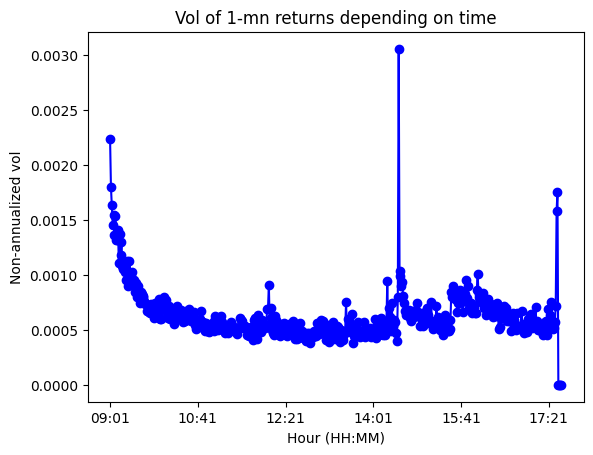

In [28]:
# Group by 'Hour_Minute' and calculate the standard deviation of returns for each time of day
volatility_by_time = data_AIR_no_first.groupby('Hour_Minute')['Return'].std()

# Display the result
print(volatility_by_time)

# Plot it
volatility_by_time.plot(marker='o', linestyle='-', color='b')
plt.title('Vol of 1-mn returns depending on time')
plt.xlabel('Hour (HH:MM)')
plt.ylabel('Non-annualized vol')
plt.show()